In [1]:
# Step 1: Web Scraping Wikipedia - Philippines
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
url = "https://en.wikipedia.org/wiki/Philippines"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
text = ''
for p in soup.find_all('p'):
    text += p.get_text()


In [3]:
text = re.sub(r'\[[0-9]*\]', '', text)  # remove citations
text = re.sub(r'\s+', ' ', text)        # remove extra whitespaces

In [4]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import sent_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # This line is added to download the punkt_tab data

# ... (rest of your code)

sentences = sent_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
data = []
for sent in sentences:
    blob = TextBlob(sent)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    data.append([sent, sentiment])

df = pd.DataFrame(data, columns=['sentence', 'sentiment'])

In [6]:
all_words = word_tokenize(text.lower())


In [7]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]


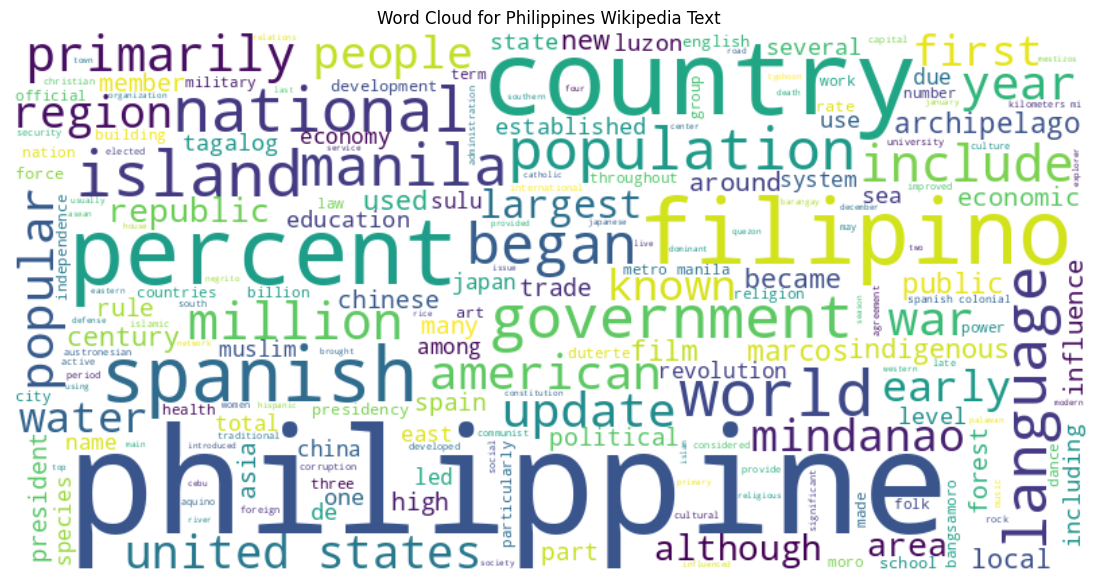

In [8]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Philippines Wikipedia Text')
plt.show()


In [9]:
from collections import Counter
word_freq = Counter(filtered_words)
print("Top 10 frequent words:", word_freq.most_common(10))


Top 10 frequent words: [('philippines', 125), ('country', 79), ('philippine', 69), ('percent', 62), ('spanish', 47), ('filipino', 34), ('manila', 31), ('world', 29), ('national', 27), ('filipinos', 25)]


In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])

In [11]:
df_binary = df[df['sentiment'] != 'neutral']
X_binary = vectorizer.transform(df_binary['sentence'])
y_binary = df_binary['sentiment']

In [12]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_binary, y_binary)

In [13]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))



Logistic Regression Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

    negative       0.98      0.85      0.91        47
    positive       0.84      0.97      0.90        39

    accuracy                           0.91        86
   macro avg       0.91      0.91      0.91        86
weighted avg       0.92      0.91      0.91        86



In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.8255813953488372
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83        47
    positive       0.77      0.87      0.82        39

    accuracy                           0.83        86
   macro avg       0.83      0.83      0.83        86
weighted avg       0.83      0.83      0.83        86



In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

    negative       1.00      0.74      0.85        47
    positive       0.76      1.00      0.87        39

    accuracy                           0.86        86
   macro avg       0.88      0.87      0.86        86
weighted avg       0.89      0.86      0.86        86



In [17]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


Gradient Boosting Accuracy: 0.8488372093023255
              precision    recall  f1-score   support

    negative       0.93      0.79      0.85        47
    positive       0.78      0.92      0.85        39

    accuracy                           0.85        86
   macro avg       0.85      0.86      0.85        86
weighted avg       0.86      0.85      0.85        86



In [18]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.872093023255814
              precision    recall  f1-score   support

    negative       0.85      0.94      0.89        47
    positive       0.91      0.79      0.85        39

    accuracy                           0.87        86
   macro avg       0.88      0.87      0.87        86
weighted avg       0.88      0.87      0.87        86



In [19]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("\nKNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.5465116279069767
              precision    recall  f1-score   support

    negative       0.55      1.00      0.71        47
    positive       0.00      0.00      0.00        39

    accuracy                           0.55        86
   macro avg       0.27      0.50      0.35        86
weighted avg       0.30      0.55      0.39        86



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Save the final chosen model and vectorizer
pickle.dump(vectorizer, open("tfidf.pkl", "wb"))
pickle.dump(rf_model, open("sentiment_model.pkl", "wb"))


In [22]:
pip install streamlit requests beautifulsoup4 nltk pandas matplotlib seaborn wordcloud textblob scikit-learn plotly pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [23]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.46.3.238:8501

  Stopping...
^C


In [24]:
pip install -r requirements.txt

In [25]:
pip install black flake8 jupyterlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
  